In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jamesvandenberg/renewable-power-generation")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\valou\.cache\kagglehub\datasets\jamesvandenberg\renewable-power-generation\versions\2


Vytvářím model Lineární regrese na datech o výrobě obnovitelné energie dle roku:

In [39]:
data = pd.read_csv('renewablePowerGeneration97-17.csv')
print(data)

    Year  Hydro(TWh)  Biofuel(TWh)  Solar PV (TWh)  Geothermal (TWh)
0   1990     2191.67          3.88            0.09             36.42
1   1991     2268.63          4.19            0.10             37.39
2   1992     2267.16          4.63            0.12             39.30
3   1993     2397.67          5.61            0.15             40.23
4   1994     2419.73          7.31            0.17             41.05
5   1995     2545.96          7.95            0.19             39.89
6   1996     2583.18          9.45            0.22             42.18
7   1997     2614.54         12.08            0.27             42.38
8   1998     2628.63         16.07            0.35             45.35
9   1999     2636.26         21.52            0.61             48.66
10  2000     2695.85         31.34            0.99             51.98
11  2001     2638.20         38.45            1.32             51.57
12  2002     2711.12         52.85            1.58             52.29
13  2003     2726.33         64.23

In [40]:
X = data[['Hydro(TWh)']]
y = data['Year']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [42]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [43]:
print('Sklon přímky je:', model.coef_[0])
print('Průsečík s osou y je:', model.intercept_)

Sklon přímky je: 0.012746601220929629
Průsečík s osou y je: 1965.0180095478709


In [44]:
#Předpověď na testovací sadě:
y_pred = model.predict(X_test)

#Vyhodnocení modelu:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error je:', mse)
print('R-swuared (R2):', r2)

Mean Squared Error je: 17.496073998887677
R-swuared (R2): 0.6855423544882894


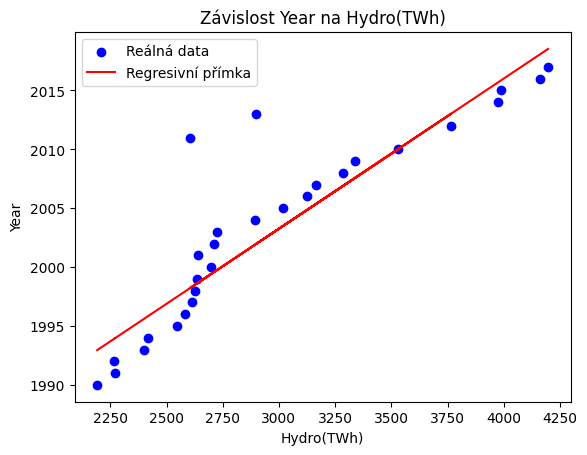

In [45]:
#Vizualizace výsledků:
plt.scatter(X, y, color = 'blue', label = 'Reálná data')
plt.plot(X, model.predict(X), color = 'red', label = 'Regresivní přímka')
plt.xlabel('Hydro(TWh)')
plt.ylabel('Year')
plt.legend()
plt.title('Závislost Year na Hydro(TWh)')
plt.show()

In [46]:
#Využití modelu:
new_hydro = [[5000]]
predicted_year = model.predict(new_hydro)
print('Předpovězený rok:', predicted_year[0], 'THw')

Předpovězený rok: 2028.751015652519 THw


d:\Datový analitik\Moje příklady\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Dané data použiju pro metodu Rozhodovací stromy:

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
model = DecisionTreeRegressor(random_state=42, max_depth=3)

In [49]:
#Natrénovéní modelu:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [50]:
#Předpověď na trénovací sadě:
y_pred = model.predict(X_test)

In [51]:
#Vyhodnocení modelu:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error je: {mse}')

Mean Squared Error je: 23.99833333333338


d:\Datový analitik\Moje příklady\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


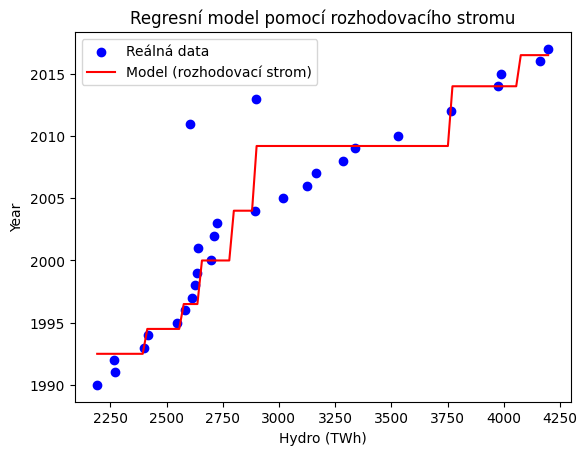

In [52]:
#Vizualizace modelu:
x_range = np.linspace(X["Hydro(TWh)"].min(), X["Hydro(TWh)"].max(), 100).reshape(-1, 1)
#tímto krokem jem rovnoměrně rozdělil hodnoty mezi minimální a maximální hodnotou vsutpní proměnnné Hydro(TWh)
#těchto 100 bodů reprezentuje spojité hodnoty Hydro (TWh), které jsou použity k predikci modelu
y_range_pred = model.predict(x_range)
#pro všechny hodnoty v x_range vypočítá model predikce y(Year)

plt.scatter(X, y, color="blue", label="Reálná data")
plt.plot(x_range, y_range_pred, color="red", label="Model (rozhodovací strom)")
plt.xlabel("Hydro (TWh)")
plt.ylabel("Year")
plt.legend()
plt.title("Regresní model pomocí rozhodovacího stromu")
plt.show()